In [1]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lrg
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [2]:
#Крок 1
nmp.random.seed(0)
cnt = 1000
spaces = nmp.random.randint(50, 201, size=cnt)
rooms = nmp.random.randint(1, 6, size=cnt)
dists = nmp.random.randint(1, 21, size=cnt)
prices = [10 * space + 5 * room - 2 * dist + nmp.random.randint(0, 10) for space, room, dist in zip(spaces, rooms, dists)]
info = {
    'Housing area (m^2)': spaces,
    'Number of bedrooms': rooms,
    'Distance to the center (km)': dists,
    'Housing price ($1000)': prices
}
infoframe = pnd.DataFrame(info)
infoframe.to_csv('Data.csv', index=False)

In [3]:
#Крок 2
data = pnd.read_csv('Data.csv')
data = data.dropna()
x = data[['Housing area (m^2)', 'Number of bedrooms', 'Distance to the center (km)']]
y = data['Housing price ($1000)']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)

In [4]:
#Крок 3
lr = lrg()
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)

In [5]:
#Крок 4
print(f'MSE: {mse(ytest, pred):.2f}')
print(f'R^2: {r2(ytest, pred):.2f}')

MSE: 7.76
R^2: 1.00


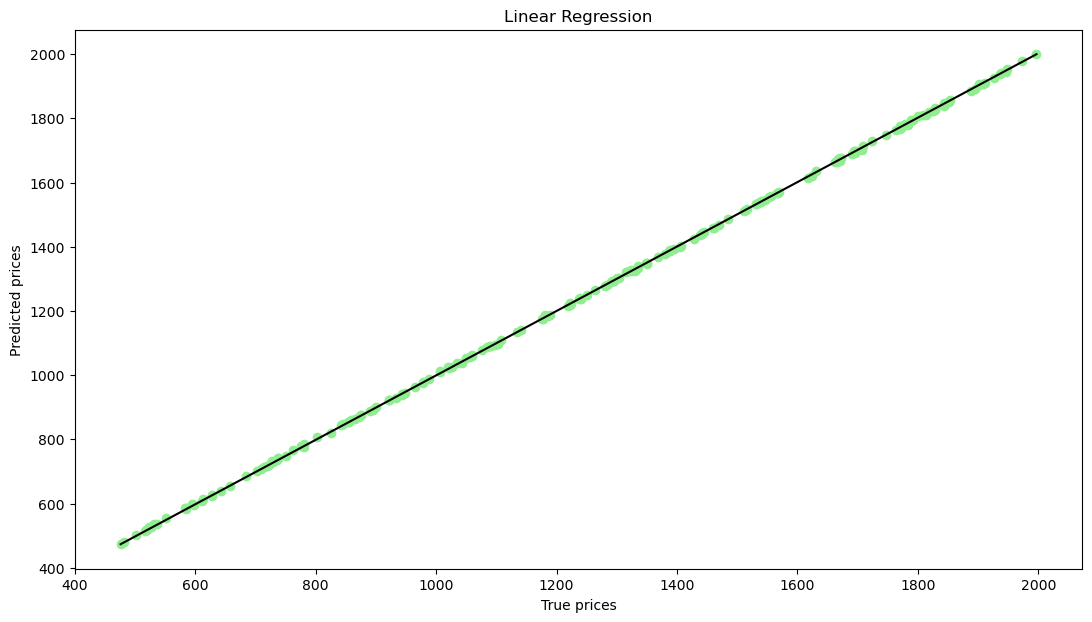

In [6]:
#Крок 5
ppl.figure(figsize=(13,7))
ppl.scatter(ytest, pred, color='lightgreen')
ppl.plot([min(ytest), max(ytest)], [min(pred), max(pred)], linestyle='-', color='black')
ppl.xlabel('True prices')
ppl.ylabel('Predicted prices')
ppl.title('Linear Regression')
ppl.show(close=None, block=None)

Step 6

Metric results from step 4 are pretty good: MSE = 7.76, R^2 = 1. Moreover, according to the graph, the predicted values almost all lie on the same straight line. Therefore, it can be concluded that this model is qualitative and able to accurately predict the price of housing based on the entered characteristics.